In [ ]:
!pip install --force-reinstall pandas

  Using cached pandas-2.3.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (91 kB)
  Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
Using cached pandas-2.3.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.4 MB)
Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
Using cached six-1.17.0-py2.py3-none-any.whl (11 kB)
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalli

In [1]:
!pip install polars scikit-learn matplotlib

In [2]:
!pip install seaborn

In [3]:
from IPython import get_ipython
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl
from datetime import datetime
import sys # Import the sys module
import os # Import the os module
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

In [ ]:
# 1 - SELEÇÃO E PREPARAÇÃO DE DADOS

In [4]:
# Define the file path
file_path = '/content/202501_NovoBolsaFamilia_polars.parquet'

# Load the parquet file into a Polars DataFrame
df = pl.read_parquet(file_path)

# Apply transformations using Polars expressions within with_columns
df = df.with_columns([
    # Convert the numeric month reference to datetime
    # First, ensure the column is string for datetime parsing
    pl.col('MÊS REFERÊNCIA').cast(pl.Utf8, strict=False).str.strptime(pl.Datetime, format='%Y%m', strict=False).alias('DATA_REF'),

    # Clean and convert 'VALOR PARCELA' to numeric
    pl.col('VALOR PARCELA').cast(pl.Utf8, strict=False).str.replace_all(',', '.', literal=True).cast(pl.Float64, strict=False).alias('VALOR')
])

# You might want to drop the original columns if no longer needed
# df = df.drop(['MÊS REFERÊNCIA', 'VALOR PARCELA']) # Uncomment if you want to drop original columns

# Verificar resultado
print(df.head())

shape: (5, 11)
┌──────────────┬─────────────┬─────┬─────────────┬───┬─────────────┬─────────┬─────────────┬───────┐
│ MÊS          ┆ MÊS         ┆ UF  ┆ CÓDIGO      ┆ … ┆ NOME        ┆ VALOR   ┆ DATA_REF    ┆ VALOR │
│ COMPETÊNCIA  ┆ REFERÊNCIA  ┆ --- ┆ MUNICÍPIO   ┆   ┆ FAVORECIDO  ┆ PARCELA ┆ ---         ┆ ---   │
│ ---          ┆ ---         ┆ str ┆ SIAFI       ┆   ┆ ---         ┆ ---     ┆ datetime[μs ┆ f64   │
│ i64          ┆ i64         ┆     ┆ ---         ┆   ┆ str         ┆ str     ┆ ]           ┆       │
│              ┆             ┆     ┆ i64         ┆   ┆             ┆         ┆             ┆       │
╞══════════════╪═════════════╪═════╪═════════════╪═══╪═════════════╪═════════╪═════════════╪═══════╡
│ 202501       ┆ 202308      ┆ SP  ┆ 7071        ┆ … ┆ FERNANDA    ┆ 650,00  ┆ 2023-08-01  ┆ 650.0 │
│              ┆             ┆     ┆             ┆   ┆ RAMOS       ┆         ┆ 00:00:00    ┆       │
│              ┆             ┆     ┆             ┆   ┆ TEIXEIRA    ┆        

In [5]:
# Corrected logic to select rows where 'UF' is in the list ['AC', 'SE', 'MS']
df_filtered = df.filter(
    pl.col('UF').is_in(['AC', 'SE', 'MS'])
)

# You might want to display or further process the filtered data
display(df_filtered.head(700000))

MÊS COMPETÊNCIA,MÊS REFERÊNCIA,UF,CÓDIGO MUNICÍPIO SIAFI,NOME MUNICÍPIO,CPF FAVORECIDO,NIS FAVORECIDO,NOME FAVORECIDO,VALOR PARCELA,DATA_REF,VALOR
i64,i64,str,i64,str,str,i64,str,str,datetime[μs],f64
202501,202406,"""MS""",9815,"""TACURU""","""***.231.831-**""",16433928030,"""MARINES DE SOUZA FABRICIO""","""300,00""",2024-06-01 00:00:00,300.0
202501,202406,"""SE""",3103,"""AQUIDABA""","""***.043.815-**""",20645958292,"""GABRIELA LIMA MACIEL""","""700,00""",2024-06-01 00:00:00,700.0
202501,202407,"""AC""",157,"""ASSIS BRASIL""","""""",16679835381,"""THAMYRIS ARAUJO FONTES""","""750,00""",2024-07-01 00:00:00,750.0
202501,202407,"""AC""",645,"""BUJARI""","""""",16223537485,"""FRANCISCO OLIVEIRA DE ARAUJO""","""600,00""",2024-07-01 00:00:00,600.0
202501,202407,"""AC""",645,"""BUJARI""","""***.645.192-**""",16225812084,"""JAILTON MONTEIRO DA SILVA""","""860,00""",2024-07-01 00:00:00,860.0
…,…,…,…,…,…,…,…,…,…,…
202501,202501,"""SE""",3249,"""TOMAR DO GERU""","""***.382.455-**""",16138374283,"""ADELMA DA SILVA SANTOS""","""600,00""",2025-01-01 00:00:00,600.0
202501,202501,"""SE""",3249,"""TOMAR DO GERU""","""***.140.975-**""",16066968875,"""ADELMA DE JESUS NOVAIS""","""700,00""",2025-01-01 00:00:00,700.0
202501,202501,"""SE""",3249,"""TOMAR DO GERU""","""***.858.645-**""",21252315629,"""ADELMA MACIEL COSTA""","""850,00""",2025-01-01 00:00:00,850.0


In [6]:
acre = df_filtered.filter(
    pl.col('UF').is_in(['AC'])
)
sergipe = df_filtered.filter(
    pl.col('UF').is_in(['SE'])
)
mato_grosso_sul = df_filtered.filter(
    pl.col('UF').is_in(['MS'])
)

In [ ]:
# 2 - ANALISE DESCRITIVA

Dados para plotagem:
    DATA_REF  VALOR_MINIMO  VALOR_MEDIO  VALOR_MAXIMO  BENEFICIARIO
0 2024-06-01         300.0       500.00         700.0             2
1 2024-07-01         325.0       674.23        1336.0            71
2 2024-08-01         300.0       676.50        1586.0           134
3 2024-09-01         300.0       669.31        1352.0           171
4 2024-10-01         300.0       641.27        1728.0           750


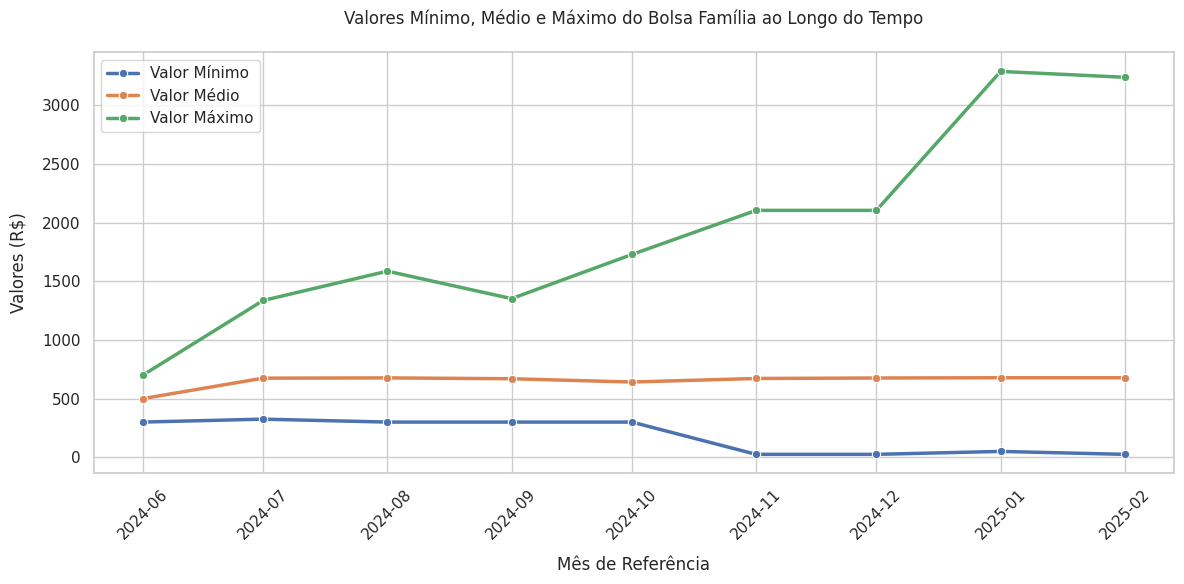

In [56]:
# Certifique-se que os dados estão corretamente agrupados
df_agrupado = df_filtered.group_by("DATA_REF").agg(
    pl.col("VALOR").min().alias("VALOR_MINIMO").round(2),
    pl.col("VALOR").mean().alias("VALOR_MEDIO").round(2),
    pl.col("VALOR").max().alias("VALOR_MAXIMO").round(2),
    pl.col("NIS FAVORECIDO").count().alias("BENEFICIARIO").round(2)
).sort("DATA_REF")

# Converter para Pandas explicitamente
df_plot = df_agrupado.to_pandas()

# Verificar os dados que serão plotados
print("Dados para plotagem:")
print(df_plot.head())

# Configurar o estilo do seaborn
sns.set_theme(style="whitegrid")

# Criar a figura e o eixo explicitamente
fig, ax = plt.subplots(figsize=(12, 6))

# Plotar usando seaborn, chamando lineplot for each desired column
sns.lineplot(
    data=df_plot,
    x="DATA_REF",
    y="VALOR_MINIMO", # Change 'VALORES' to 'VALOR_MINIMO'
    ax=ax,  # Especificar o eixo
    marker='o',  # Adicionar marcadores
    linewidth=2.5,  # Tornar a linha mais visível
    label='Valor Mínimo' # Add a label for the legend
)

sns.lineplot(
    data=df_plot,
    x="DATA_REF",
    y="VALOR_MEDIO", # Change 'VALORES' to 'VALOR_MEDIO'
    ax=ax,  # Especificar o eixo
    marker='o',  # Adicionar marcadores
    linewidth=2.5,  # Tornar a linha mais visível
    label='Valor Médio' # Add a label for the legend
)

sns.lineplot(
    data=df_plot,
    x="DATA_REF",
    y="VALOR_MAXIMO", # Change 'VALORES' to 'VALOR_MAXIMO'
    ax=ax,  # Especificar o eixo
    marker='o',  # Adicionar marcadores
    linewidth=2.5,  # Tornar a linha mais visível
    label='Valor Máximo' # Add a label for the legend
)

# Configurações adicionais
ax.set_title("Valores Mínimo, Médio e Máximo do Bolsa Família ao Longo do Tempo", pad=20)
ax.set_xlabel("Mês de Referência", labelpad=10)
ax.set_ylabel("Valores (R$)", labelpad=10)
ax.tick_params(axis='x', rotation=45)  # Rotacionar labels do eixo x

# Adicionar legenda
ax.legend()

# Ajustar layout para evitar cortes
plt.tight_layout()
plt.show()

In [57]:
sns.barplot(
    data=df_plot,
    x="DATA_REF",
    y="BENEFICIARIO", # Change 'VALORES' to 'Beneficiário'
    ax=ax,  # Especificar o eixo
)

# Configurações adicionais
ax.set_title("Quantidade de Beneficiários do Bolsa Família ao Longo do Tempo", pad=20)
ax.set_xlabel("Mês de Referência", labelpad=10)
ax.set_ylabel("Beneficiários", labelpad=10)
ax.tick_params(axis='x', rotation=45)  # Rotacionar labels do eixo x

# Ajustar layout para evitar cortes
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_base.py:1135: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  converter.update_units(seed_data)


<Figure size 640x480 with 0 Axes>

Dados para plotagem:
    DATA_REF  VALOR_MINIMO  VALOR_MEDIO  VALOR_MAXIMO  BENEFICIARIO
0 2024-07-01         350.0       707.40        1336.0            15
1 2024-08-01         350.0       659.40         910.0            25
2 2024-09-01         350.0       676.71        1060.0            41
3 2024-10-01         300.0       659.36        1060.0            83
4 2024-11-01         300.0       724.24        2104.0           163


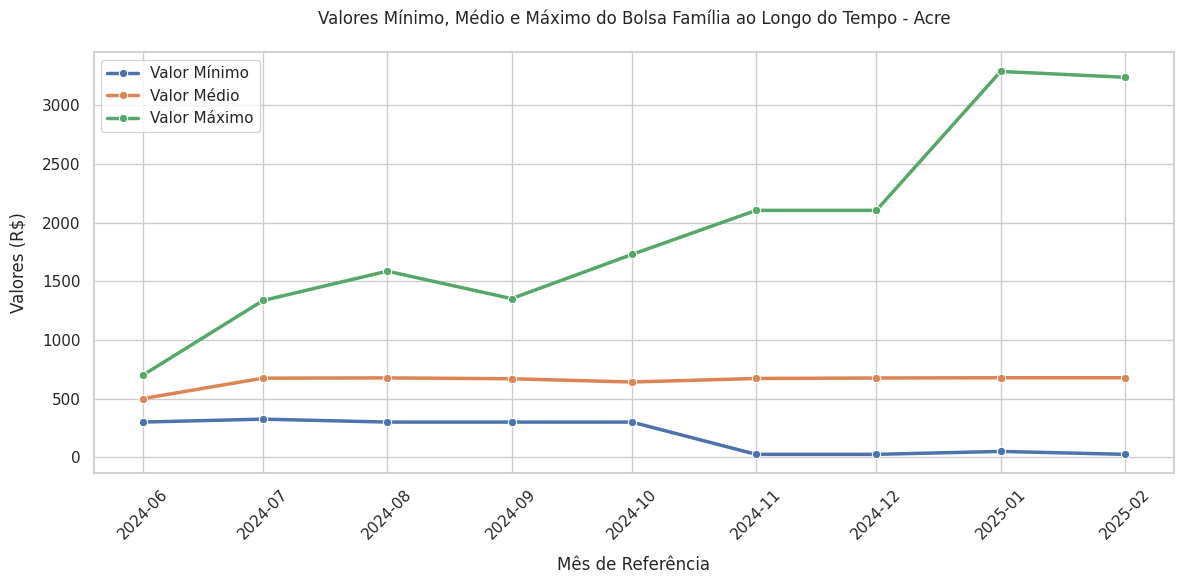

In [58]:
# Certifique-se que os dados estão corretamente agrupados
df_agrupado_AC = acre.group_by("DATA_REF").agg(
    pl.col("VALOR").min().alias("VALOR_MINIMO").round(2),
    pl.col("VALOR").mean().alias("VALOR_MEDIO").round(2),
    pl.col("VALOR").max().alias("VALOR_MAXIMO").round(2),
    pl.col("NIS FAVORECIDO").count().alias("BENEFICIARIO").round(2)
).sort("DATA_REF")

# Converter para Pandas explicitamente
df_plot_AC = df_agrupado_AC.to_pandas()

# Verificar os dados que serão plotados
print("Dados para plotagem:")
print(df_plot_AC.head())

# Configurar o estilo do seaborn
sns.set_theme(style="whitegrid")

# Criar a figura e o eixo explicitamente
fig, ax = plt.subplots(figsize=(12, 6))

# Plotar usando seaborn, chamando lineplot for each desired column
sns.lineplot(
    data=df_plot,
    x="DATA_REF",
    y="VALOR_MINIMO", # Change 'VALORES' to 'VALOR_MINIMO'
    ax=ax,  # Especificar o eixo
    marker='o',  # Adicionar marcadores
    linewidth=2.5,  # Tornar a linha mais visível
    label='Valor Mínimo' # Add a label for the legend
)

sns.lineplot(
    data=df_plot,
    x="DATA_REF",
    y="VALOR_MEDIO", # Change 'VALORES' to 'VALOR_MEDIO'
    ax=ax,  # Especificar o eixo
    marker='o',  # Adicionar marcadores
    linewidth=2.5,  # Tornar a linha mais visível
    label='Valor Médio' # Add a label for the legend
)

sns.lineplot(
    data=df_plot,
    x="DATA_REF",
    y="VALOR_MAXIMO", # Change 'VALORES' to 'VALOR_MAXIMO'
    ax=ax,  # Especificar o eixo
    marker='o',  # Adicionar marcadores
    linewidth=2.5,  # Tornar a linha mais visível
    label='Valor Máximo' # Add a label for the legend
)

# Configurações adicionais
ax.set_title("Valores Mínimo, Médio e Máximo do Bolsa Família ao Longo do Tempo - Acre", pad=20)
ax.set_xlabel("Mês de Referência", labelpad=10)
ax.set_ylabel("Valores (R$)", labelpad=10)
ax.tick_params(axis='x', rotation=45)  # Rotacionar labels do eixo x

# Adicionar legenda
ax.legend()

# Ajustar layout para evitar cortes
plt.tight_layout()
plt.show()

In [59]:
sns.barplot(
    data=df_plot,
    x="DATA_REF",
    y="BENEFICIARIO", # Change 'VALORES' to 'Beneficiário'
    ax=ax,  # Especificar o eixo
)

# Configurações adicionais
ax.set_title("Quantidade de Beneficiários do Bolsa Família ao Longo do Tempo - Acre", pad=20)
ax.set_xlabel("Mês de Referência", labelpad=10)
ax.set_ylabel("Beneficiários", labelpad=10)
ax.tick_params(axis='x', rotation=45)  # Rotacionar labels do eixo x

# Ajustar layout para evitar cortes
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_base.py:1135: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  converter.update_units(seed_data)


<Figure size 640x480 with 0 Axes>

Dados para plotagem:
    DATA_REF  VALOR_MINIMO  VALOR_MEDIO  VALOR_MAXIMO  BENEFICIARIO
0 2024-06-01         700.0       700.00         700.0             1
1 2024-07-01         325.0       671.52        1302.0            42
2 2024-08-01         300.0       657.77        1302.0            79
3 2024-09-01         300.0       647.93        1302.0            90
4 2024-10-01         300.0       627.89        1728.0           504


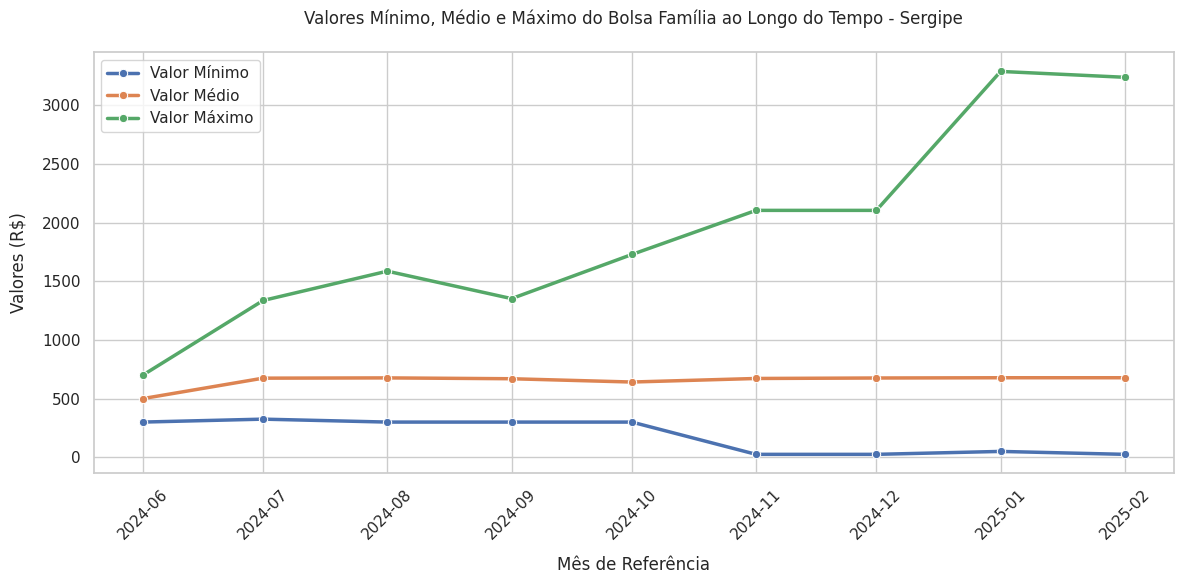

In [53]:
# Certifique-se que os dados estão corretamente agrupados
df_agrupado_SE = sergipe.group_by("DATA_REF").agg(
    pl.col("VALOR").min().alias("VALOR_MINIMO").round(2),
    pl.col("VALOR").mean().alias("VALOR_MEDIO").round(2),
    pl.col("VALOR").max().alias("VALOR_MAXIMO").round(2),
    pl.col("NIS FAVORECIDO").count().alias("BENEFICIARIO").round(2)
).sort("DATA_REF")

# Converter para Pandas explicitamente
df_plot_SE = df_agrupado_SE.to_pandas()

# Verificar os dados que serão plotados
print("Dados para plotagem:")
print(df_plot_SE.head())

# Configurar o estilo do seaborn
sns.set_theme(style="whitegrid")

# Criar a figura e o eixo explicitamente
fig, ax = plt.subplots(figsize=(12, 6))

# Plotar usando seaborn, chamando lineplot for each desired column
sns.lineplot(
    data=df_plot,
    x="DATA_REF",
    y="VALOR_MINIMO", # Change 'VALORES' to 'VALOR_MINIMO'
    ax=ax,  # Especificar o eixo
    marker='o',  # Adicionar marcadores
    linewidth=2.5,  # Tornar a linha mais visível
    label='Valor Mínimo' # Add a label for the legend
)

sns.lineplot(
    data=df_plot,
    x="DATA_REF",
    y="VALOR_MEDIO", # Change 'VALORES' to 'VALOR_MEDIO'
    ax=ax,  # Especificar o eixo
    marker='o',  # Adicionar marcadores
    linewidth=2.5,  # Tornar a linha mais visível
    label='Valor Médio' # Add a label for the legend
)

sns.lineplot(
    data=df_plot,
    x="DATA_REF",
    y="VALOR_MAXIMO", # Change 'VALORES' to 'VALOR_MAXIMO'
    ax=ax,  # Especificar o eixo
    marker='o',  # Adicionar marcadores
    linewidth=2.5,  # Tornar a linha mais visível
    label='Valor Máximo' # Add a label for the legend
)

# Configurações adicionais
ax.set_title("Valores Mínimo, Médio e Máximo do Bolsa Família ao Longo do Tempo - Sergipe", pad=20)
ax.set_xlabel("Mês de Referência", labelpad=10)
ax.set_ylabel("Valores (R$)", labelpad=10)
ax.tick_params(axis='x', rotation=45)  # Rotacionar labels do eixo x

# Adicionar legenda
ax.legend()

# Ajustar layout para evitar cortes
plt.tight_layout()
plt.show()

In [54]:
sns.barplot(
    data=df_plot,
    x="DATA_REF",
    y="BENEFICIARIO", # Change 'VALORES' to 'Beneficiário'
    ax=ax,  # Especificar o eixo
)

# Configurações adicionais
ax.set_title("Quantidade de Beneficiários do Bolsa Família ao Longo do Tempo - Sergipe", pad=20)
ax.set_xlabel("Mês de Referência", labelpad=10)
ax.set_ylabel("Beneficiários", labelpad=10)
ax.tick_params(axis='x', rotation=45)  # Rotacionar labels do eixo x

# Ajustar layout para evitar cortes
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_base.py:1135: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  converter.update_units(seed_data)


<Figure size 640x480 with 0 Axes>

Dados para plotagem:
    DATA_REF  VALOR_MINIMO  VALOR_MEDIO  VALOR_MAXIMO  BENEFICIARIO
0 2024-06-01         300.0       300.00         300.0             1
1 2024-07-01         350.0       646.79         850.0            14
2 2024-08-01         350.0       740.07        1586.0            30
3 2024-09-01         325.0       709.83        1352.0            40
4 2024-10-01         300.0       673.45        1436.0           163


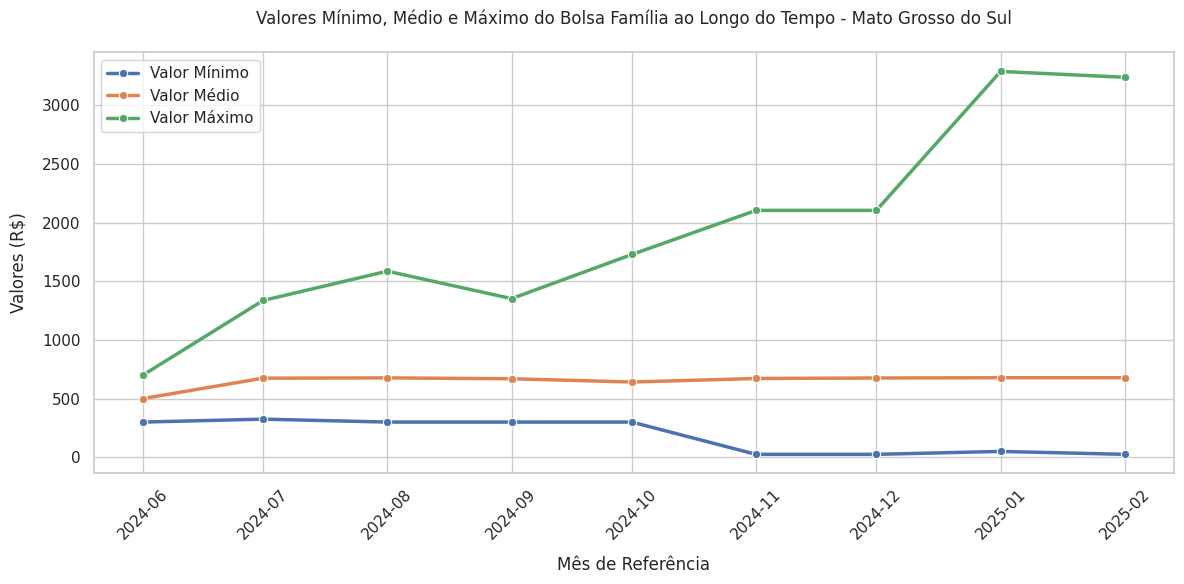

In [60]:
# Certifique-se que os dados estão corretamente agrupados
df_agrupado_MS = mato_grosso_sul.group_by("DATA_REF").agg(
    pl.col("VALOR").min().alias("VALOR_MINIMO").round(2),
    pl.col("VALOR").mean().alias("VALOR_MEDIO").round(2),
    pl.col("VALOR").max().alias("VALOR_MAXIMO").round(2),
    pl.col("NIS FAVORECIDO").count().alias("BENEFICIARIO").round(2)
).sort("DATA_REF")

# Converter para Pandas explicitamente
df_plot_MS = df_agrupado_MS.to_pandas()

# Verificar os dados que serão plotados
print("Dados para plotagem:")
print(df_plot_MS.head())

# Configurar o estilo do seaborn
sns.set_theme(style="whitegrid")

# Criar a figura e o eixo explicitamente
fig, ax = plt.subplots(figsize=(12, 6))

# Plotar usando seaborn, chamando lineplot for each desired column
sns.lineplot(
    data=df_plot,
    x="DATA_REF",
    y="VALOR_MINIMO", # Change 'VALORES' to 'VALOR_MINIMO'
    ax=ax,  # Especificar o eixo
    marker='o',  # Adicionar marcadores
    linewidth=2.5,  # Tornar a linha mais visível
    label='Valor Mínimo' # Add a label for the legend
)

sns.lineplot(
    data=df_plot,
    x="DATA_REF",
    y="VALOR_MEDIO", # Change 'VALORES' to 'VALOR_MEDIO'
    ax=ax,  # Especificar o eixo
    marker='o',  # Adicionar marcadores
    linewidth=2.5,  # Tornar a linha mais visível
    label='Valor Médio' # Add a label for the legend
)

sns.lineplot(
    data=df_plot,
    x="DATA_REF",
    y="VALOR_MAXIMO", # Change 'VALORES' to 'VALOR_MAXIMO'
    ax=ax,  # Especificar o eixo
    marker='o',  # Adicionar marcadores
    linewidth=2.5,  # Tornar a linha mais visível
    label='Valor Máximo' # Add a label for the legend
)

# Configurações adicionais
ax.set_title("Valores Mínimo, Médio e Máximo do Bolsa Família ao Longo do Tempo - Mato Grosso do Sul", pad=20)
ax.set_xlabel("Mês de Referência", labelpad=10)
ax.set_ylabel("Valores (R$)", labelpad=10)
ax.tick_params(axis='x', rotation=45)  # Rotacionar labels do eixo x

# Adicionar legenda
ax.legend()

# Ajustar layout para evitar cortes
plt.tight_layout()
plt.show()

In [61]:
sns.barplot(
    data=df_plot,
    x="DATA_REF",
    y="BENEFICIARIO", # Change 'VALORES' to 'Beneficiário'
    ax=ax,  # Especificar o eixo
)

# Configurações adicionais
ax.set_title("Quantidade de Beneficiários do Bolsa Família ao Longo do Tempo - Mato Grosso do Sul", pad=20)
ax.set_xlabel("Mês de Referência", labelpad=10)
ax.set_ylabel("Beneficiários", labelpad=10)
ax.tick_params(axis='x', rotation=45)  # Rotacionar labels do eixo x

# Ajustar layout para evitar cortes
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_base.py:1135: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  converter.update_units(seed_data)


<Figure size 640x480 with 0 Axes>

In [ ]:
# 3 - MODELAGEM PREDITIVA

In [30]:
# 1. Converter para tipo Date do Polars se necessário
if df_agrupado["DATA_REF"].dtype != pl.Date:
    df_agrupado = df_agrupado.with_columns(
        pl.col("DATA_REF").cast(pl.Date)
    )

# 2. Calcular usando expressões puras do Polars
df_reg = df_agrupado.with_columns(
    (pl.col("DATA_REF").dt.year() * 12 + pl.col("DATA_REF").dt.month() -
     (pl.col("DATA_REF").min().dt.year() * 12 + pl.col("DATA_REF").min().dt.month()))
    .alias("MESES_DESDE_INICIO")
)

# 3. Verificar o resultado
print(df_reg.select(["DATA_REF", "MESES_DESDE_INICIO"]).head())

shape: (5, 2)
┌────────────┬────────────────────┐
│ DATA_REF   ┆ MESES_DESDE_INICIO │
│ ---        ┆ ---                │
│ date       ┆ i32                │
╞════════════╪════════════════════╡
│ 2024-06-01 ┆ 0                  │
│ 2024-07-01 ┆ 1                  │
│ 2024-08-01 ┆ 2                  │
│ 2024-09-01 ┆ 3                  │
│ 2024-10-01 ┆ 4                  │
└────────────┴────────────────────┘


Equação da reta: VALOR_MEDIO = 12.04 * MESES_DESDE_INICIO + 603.40
Coeficiente angular (R$/mês): 12.04
Intercepto (valor inicial): R$ 603.40

Métricas de avaliação:
Coeficiente de Determinação (R²): 0.3236
Erro Quadrático Médio (MSE): 2020.37


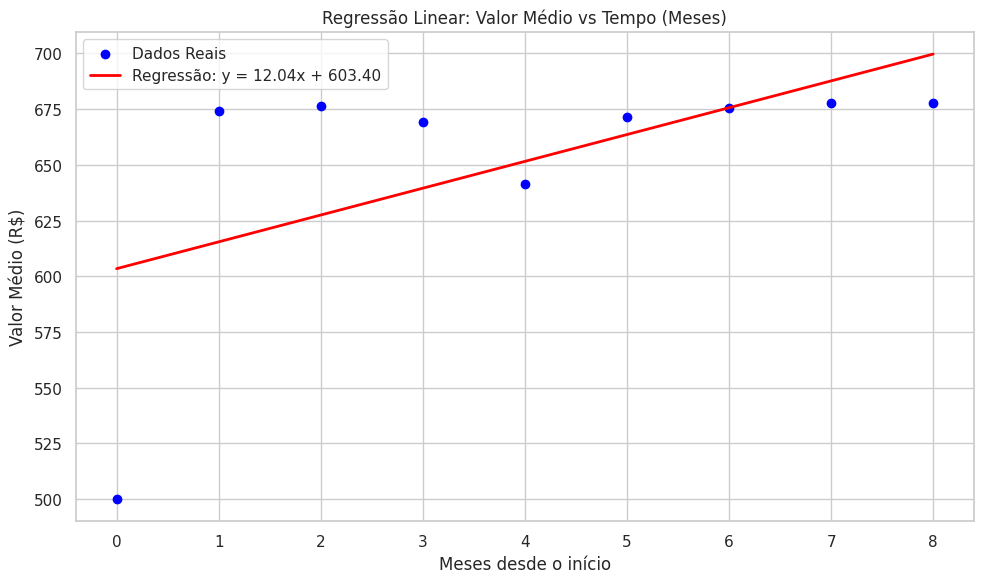

In [31]:


## 1. Preparar os dados para o modelo
# Converter para arrays numpy
X = df_reg["MESES_DESDE_INICIO"].to_numpy().reshape(-1, 1)  # Variável independente (meses)
y = df_reg["VALOR_MEDIO"].to_numpy()                        # Variável dependente (valor)

## 2. Criar e treinar o modelo
modelo = LinearRegression()
modelo.fit(X, y)

# Coeficientes do modelo
inclinacao = modelo.coef_[0]
intercepto = modelo.intercept_

print(f"Equação da reta: VALOR_MEDIO = {inclinacao:.2f} * MESES_DESDE_INICIO + {intercepto:.2f}")
print(f"Coeficiente angular (R$/mês): {inclinacao:.2f}")
print(f"Intercepto (valor inicial): R$ {intercepto:.2f}")

## 3. Fazer previsões
y_pred = modelo.predict(X)

## 4. Avaliar o modelo

r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print(f"\nMétricas de avaliação:")
print(f"Coeficiente de Determinação (R²): {r2:.4f}")
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")

## 5. Visualização dos resultados
plt.figure(figsize=(10, 6))

# Plotar dados reais
plt.scatter(X, y, color='blue', label='Dados Reais')

# Plotar linha de regressão
plt.plot(X, y_pred, color='red', linewidth=2, label=f'Regressão: y = {inclinacao:.2f}x + {intercepto:.2f}')

# Configurações do gráfico
plt.title('Regressão Linear: Valor Médio vs Tempo (Meses)')
plt.xlabel('Meses desde o início')
plt.ylabel('Valor Médio (R$)')
plt.grid(True)
plt.legend()

# Mostrar gráfico
plt.tight_layout()
plt.show()

In [ ]:
#Gráfico individual para cada estado

In [ ]:
#ACRE

In [50]:
# 1. Converter para tipo Date do Polars se necessário
if df_agrupado_AC["DATA_REF"].dtype != pl.Date:
    df_agrupado_AC = df_agrupado_AC.with_columns(
        pl.col("DATA_REF").cast(pl.Date)
    )

# 2. Calcular usando expressões puras do Polars
df_reg_AC = df_agrupado_AC.with_columns(
    (pl.col("DATA_REF").dt.year() * 12 + pl.col("DATA_REF").dt.month() -
     (pl.col("DATA_REF").min().dt.year() * 12 + pl.col("DATA_REF").min().dt.month()))
    .alias("MESES_DESDE_INICIO")
)

# 3. Verificar o resultado
print(df_reg_AC.select(["DATA_REF", "MESES_DESDE_INICIO"]).head())

shape: (5, 2)
┌────────────┬────────────────────┐
│ DATA_REF   ┆ MESES_DESDE_INICIO │
│ ---        ┆ ---                │
│ date       ┆ i32                │
╞════════════╪════════════════════╡
│ 2024-07-01 ┆ 0                  │
│ 2024-08-01 ┆ 1                  │
│ 2024-09-01 ┆ 2                  │
│ 2024-10-01 ┆ 3                  │
│ 2024-11-01 ┆ 4                  │
└────────────┴────────────────────┘


Equação da reta: VALOR_MEDIO = 6.71 * MESES_DESDE_INICIO + 674.28
Coeficiente angular (R$/mês): 6.71
Intercepto (valor inicial): R$ 674.28

Métricas de avaliação:
Coeficiente de Determinação (R²): 0.3465
Erro Quadrático Médio (MSE): 445.21


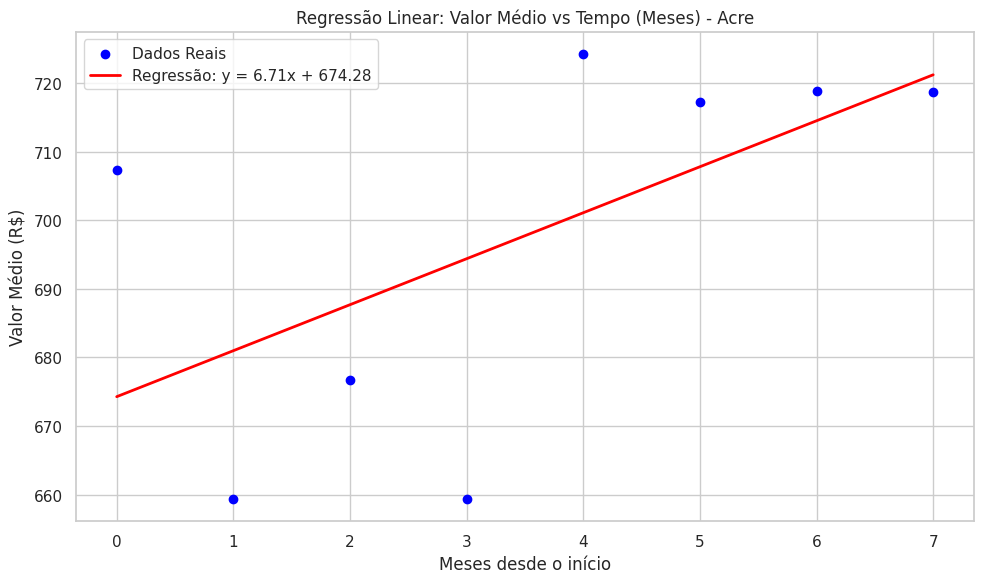

In [51]:
## 1. Preparar os dados para o modelo
# Converter para arrays numpy
X = df_reg_AC["MESES_DESDE_INICIO"].to_numpy().reshape(-1, 1)  # Variável independente (meses)
y = df_reg_AC["VALOR_MEDIO"].to_numpy()                        # Variável dependente (valor)

## 2. Criar e treinar o modelo
modelo_AC = LinearRegression()
modelo_AC.fit(X, y)

# Coeficientes do modelo
inclinacao_AC = modelo_AC.coef_[0]
intercepto_AC = modelo_AC.intercept_

print(f"Equação da reta: VALOR_MEDIO = {inclinacao_AC:.2f} * MESES_DESDE_INICIO + {intercepto_AC:.2f}")
print(f"Coeficiente angular (R$/mês): {inclinacao_AC:.2f}")
print(f"Intercepto (valor inicial): R$ {intercepto_AC:.2f}")

## 3. Fazer previsões
y_pred_AC = modelo_AC.predict(X)

## 4. Avaliar o modelo

r2_AC = r2_score(y, y_pred_AC)
mse_AC = mean_squared_error(y, y_pred_AC)

print(f"\nMétricas de avaliação:")
print(f"Coeficiente de Determinação (R²): {r2_AC:.4f}")
print(f"Erro Quadrático Médio (MSE): {mse_AC:.2f}")

## 5. Visualização dos resultados
plt.figure(figsize=(10, 6))

# Plotar dados reais
plt.scatter(X, y, color='blue', label='Dados Reais')

# Plotar linha de regressão
plt.plot(X, y_pred_AC, color='red', linewidth=2, label=f'Regressão: y = {inclinacao_AC:.2f}x + {intercepto_AC:.2f}')

# Configurações do gráfico
plt.title('Regressão Linear: Valor Médio vs Tempo (Meses) - Acre')
plt.xlabel('Meses desde o início')
plt.ylabel('Valor Médio (R$)')
plt.grid(True)
plt.legend()

# Mostrar gráfico
plt.tight_layout()
plt.show()

In [ ]:
#SERGIPE

In [41]:
# 1. Converter para tipo Date do Polars se necessário
if df_agrupado_SE["DATA_REF"].dtype != pl.Date:
    df_agrupado_SE = df_agrupado_SE.with_columns(
        pl.col("DATA_REF").cast(pl.Date)
    )

# 2. Calcular usando expressões puras do Polars
df_reg_SE = df_agrupado_SE.with_columns(
    (pl.col("DATA_REF").dt.year() * 12 + pl.col("DATA_REF").dt.month() -
     (pl.col("DATA_REF").min().dt.year() * 12 + pl.col("DATA_REF").min().dt.month()))
    .alias("MESES_DESDE_INICIO")
)

# 3. Verificar o resultado
print(df_reg_SE.select(["DATA_REF", "MESES_DESDE_INICIO"]).head())

shape: (5, 2)
┌────────────┬────────────────────┐
│ DATA_REF   ┆ MESES_DESDE_INICIO │
│ ---        ┆ ---                │
│ date       ┆ i32                │
╞════════════╪════════════════════╡
│ 2024-06-01 ┆ 0                  │
│ 2024-07-01 ┆ 1                  │
│ 2024-08-01 ┆ 2                  │
│ 2024-09-01 ┆ 3                  │
│ 2024-10-01 ┆ 4                  │
└────────────┴────────────────────┘


Equação da reta: VALOR_MEDIO = -3.34 * MESES_DESDE_INICIO + 671.10
Coeficiente angular (R$/mês): -3.34
Intercepto (valor inicial): R$ 671.10

Métricas de avaliação:
Coeficiente de Determinação (R²): 0.1964
Erro Quadrático Médio (MSE): 304.96


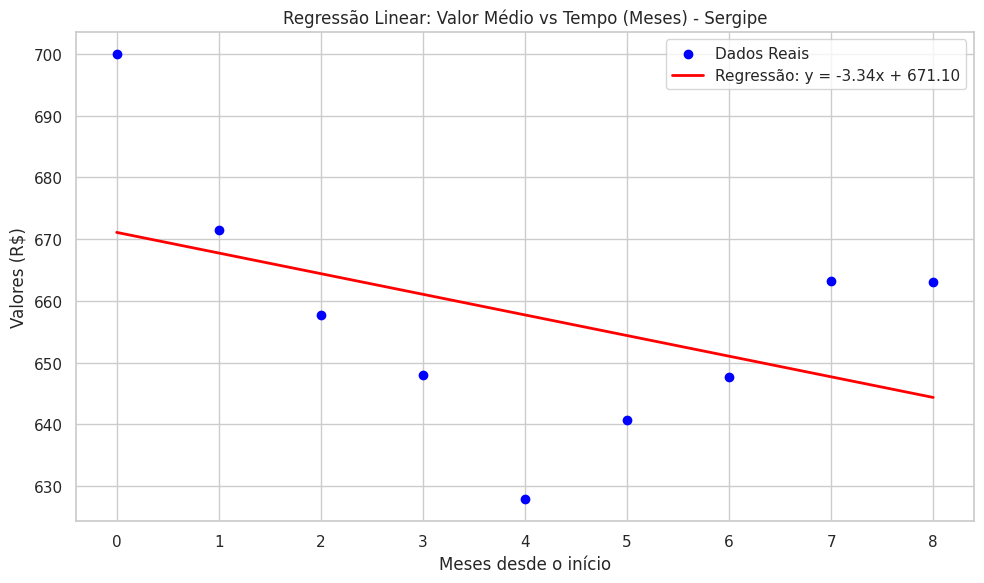

In [42]:
## 1. Preparar os dados para o modelo
# Converter para arrays numpy
X = df_reg_SE["MESES_DESDE_INICIO"].to_numpy().reshape(-1, 1)  # Variável independente (meses)
y = df_reg_SE["VALOR_MEDIO"].to_numpy()                        # Variável dependente (valor)

## 2. Criar e treinar o modelo
modelo_SE = LinearRegression()
modelo_SE.fit(X, y)

# Coeficientes do modelo
inclinacao_SE = modelo_SE.coef_[0]
intercepto_SE = modelo_SE.intercept_

print(f"Equação da reta: VALOR_MEDIO = {inclinacao_SE:.2f} * MESES_DESDE_INICIO + {intercepto_SE:.2f}")
print(f"Coeficiente angular (R$/mês): {inclinacao_SE:.2f}")
print(f"Intercepto (valor inicial): R$ {intercepto_SE:.2f}")

## 3. Fazer previsões
y_pred_SE = modelo_SE.predict(X)

## 4. Avaliar o modelo

r2_SE = r2_score(y, y_pred_SE)
mse_SE = mean_squared_error(y, y_pred_SE)

print(f"\nMétricas de avaliação:")
print(f"Coeficiente de Determinação (R²): {r2_SE:.4f}")
print(f"Erro Quadrático Médio (MSE): {mse_SE:.2f}")

## 5. Visualização dos resultados
plt.figure(figsize=(10, 6))

# Plotar dados reais
plt.scatter(X, y, color='blue', label='Dados Reais')

# Plotar linha de regressão
plt.plot(X, y_pred_SE, color='red', linewidth=2, label=f'Regressão: y = {inclinacao_SE:.2f}x + {intercepto_SE:.2f}')

# Configurações do gráfico
plt.title('Regressão Linear: Valor Médio vs Tempo (Meses) - Sergipe')
plt.xlabel('Meses desde o início')
plt.ylabel('Valores (R$)')
plt.grid(True)
plt.legend()

# Mostrar gráfico
plt.tight_layout()
plt.show()

In [ ]:
#MATO GROSSO DO SUL

In [46]:
# 1. Converter para tipo Date do Polars se necessário
if df_agrupado_MS["DATA_REF"].dtype != pl.Date:
    df_agrupado_MS = df_agrupado_MS.with_columns(
        pl.col("DATA_REF").cast(pl.Date)
    )

# 2. Calcular usando expressões puras do Polars
df_reg_MS = df_agrupado_MS.with_columns(
    (pl.col("DATA_REF").dt.year() * 12 + pl.col("DATA_REF").dt.month() -
     (pl.col("DATA_REF").min().dt.year() * 12 + pl.col("DATA_REF").min().dt.month()))
    .alias("MESES_DESDE_INICIO")
)

# 3. Verificar o resultado
print(df_reg_MS.select(["DATA_REF", "MESES_DESDE_INICIO"]).head())

shape: (5, 2)
┌────────────┬────────────────────┐
│ DATA_REF   ┆ MESES_DESDE_INICIO │
│ ---        ┆ ---                │
│ date       ┆ i32                │
╞════════════╪════════════════════╡
│ 2024-06-01 ┆ 0                  │
│ 2024-07-01 ┆ 1                  │
│ 2024-08-01 ┆ 2                  │
│ 2024-09-01 ┆ 3                  │
│ 2024-10-01 ┆ 4                  │
└────────────┴────────────────────┘


Equação da reta: VALOR_MEDIO = 26.60 * MESES_DESDE_INICIO + 546.56
Coeficiente angular (R$/mês): 26.60
Intercepto (valor inicial): R$ 546.56

Métricas de avaliação:
Coeficiente de Determinação (R²): -0.0783
Erro Quadrático Médio (MSE): 17662.87


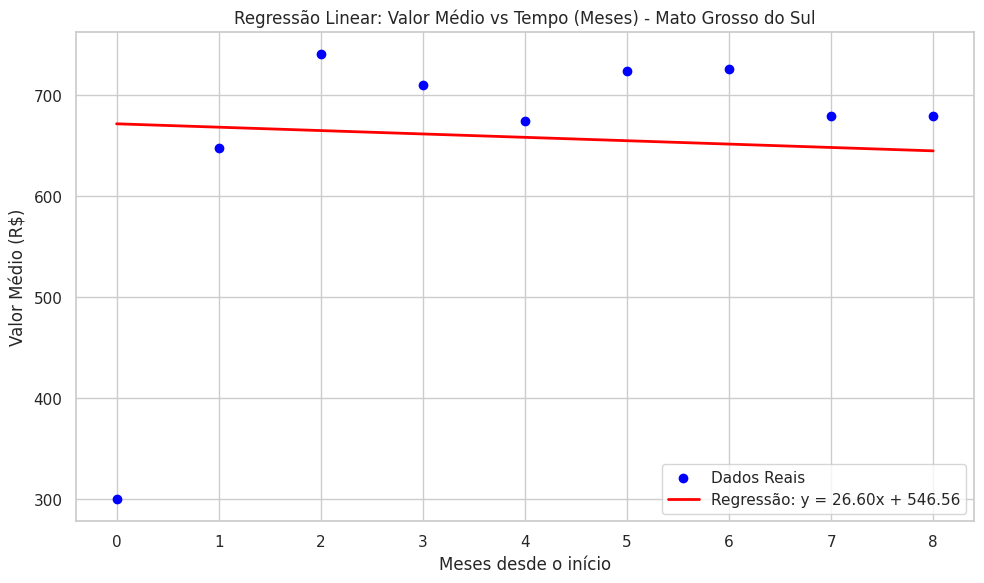

In [47]:
## 1. Preparar os dados para o modelo
# Converter para arrays numpy
X = df_reg_MS["MESES_DESDE_INICIO"].to_numpy().reshape(-1, 1)  # Variável independente (meses)
y = df_reg_MS["VALOR_MEDIO"].to_numpy()                        # Variável dependente (valor)

## 2. Criar e treinar o modelo
modelo_MS = LinearRegression()
modelo_MS.fit(X, y)

# Coeficientes do modelo
inclinacao_MS = modelo_MS.coef_[0]
intercepto_MS = modelo_MS.intercept_

print(f"Equação da reta: VALOR_MEDIO = {inclinacao_MS:.2f} * MESES_DESDE_INICIO + {intercepto_MS:.2f}")
print(f"Coeficiente angular (R$/mês): {inclinacao_MS:.2f}")
print(f"Intercepto (valor inicial): R$ {intercepto_MS:.2f}")

## 3. Fazer previsões
y_pred_MS = modelo_SE.predict(X)

## 4. Avaliar o modelo

r2_MS = r2_score(y, y_pred_MS)
mse_MS = mean_squared_error(y, y_pred_MS)

print(f"\nMétricas de avaliação:")
print(f"Coeficiente de Determinação (R²): {r2_MS:.4f}")
print(f"Erro Quadrático Médio (MSE): {mse_MS:.2f}")

## 5. Visualização dos resultados
plt.figure(figsize=(10, 6))

# Plotar dados reais
plt.scatter(X, y, color='blue', label='Dados Reais')

# Plotar linha de regressão
plt.plot(X, y_pred_MS, color='red', linewidth=2, label=f'Regressão: y = {inclinacao_MS:.2f}x + {intercepto_MS:.2f}')

# Configurações do gráfico
plt.title('Regressão Linear: Valor Médio vs Tempo (Meses) - Mato Grosso do Sul')
plt.xlabel('Meses desde o início')
plt.ylabel('Valor Médio (R$)')
plt.grid(True)
plt.legend()

# Mostrar gráfico
plt.tight_layout()
plt.show()

In [ ]:
# Intervalo de Confiança 95% por Estado

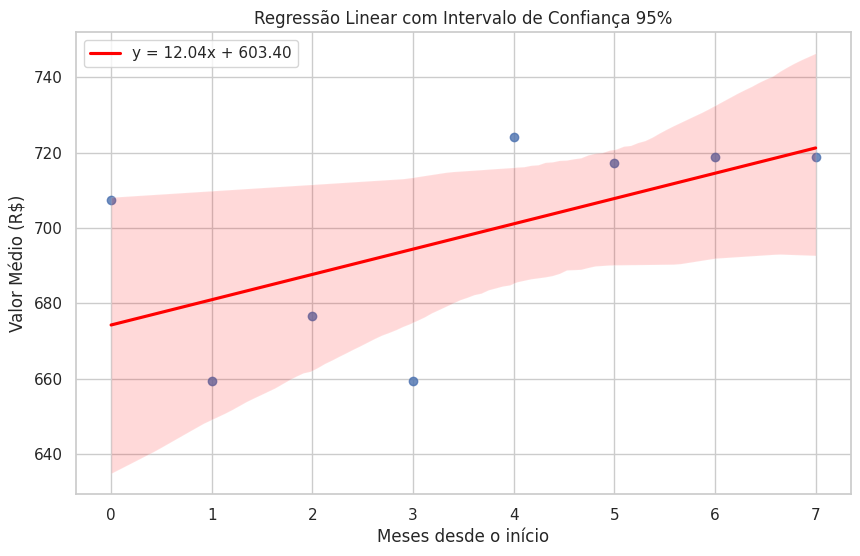

In [63]:
# Versão Alternativa com intervalo de confiança:

plt.figure(figsize=(10, 6))
sns.regplot(x=X.flatten(), y=y, ci=95,
            line_kws={'color': 'red', 'label': f'y = {inclinacao:.2f}x + {intercepto:.2f}'})
plt.title('Regressão Linear com Intervalo de Confiança 95%')
plt.xlabel('Meses desde o início')
plt.ylabel('Valor Médio (R$)')
plt.legend()
plt.grid(True)
plt.show()

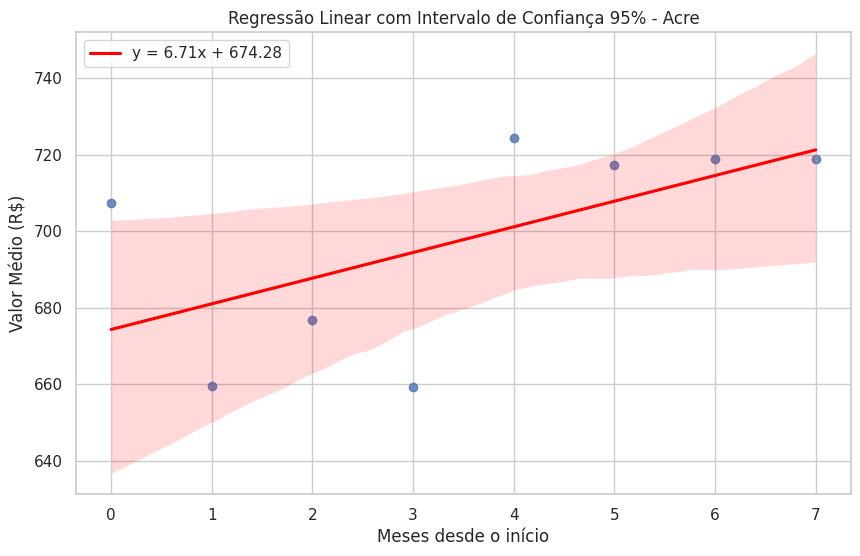

In [67]:
# Versão Alternativa com intervalo de confiança:

plt.figure(figsize=(10, 6))
sns.regplot(x=X.flatten(), y=y, ci=95,
            line_kws={'color': 'red', 'label': f'y = {inclinacao_AC:.2f}x + {intercepto_AC:.2f}'})
plt.title('Regressão Linear com Intervalo de Confiança 95% - Acre')
plt.xlabel('Meses desde o início')
plt.ylabel('Valor Médio (R$)')
plt.legend()
plt.grid(True)
plt.show()

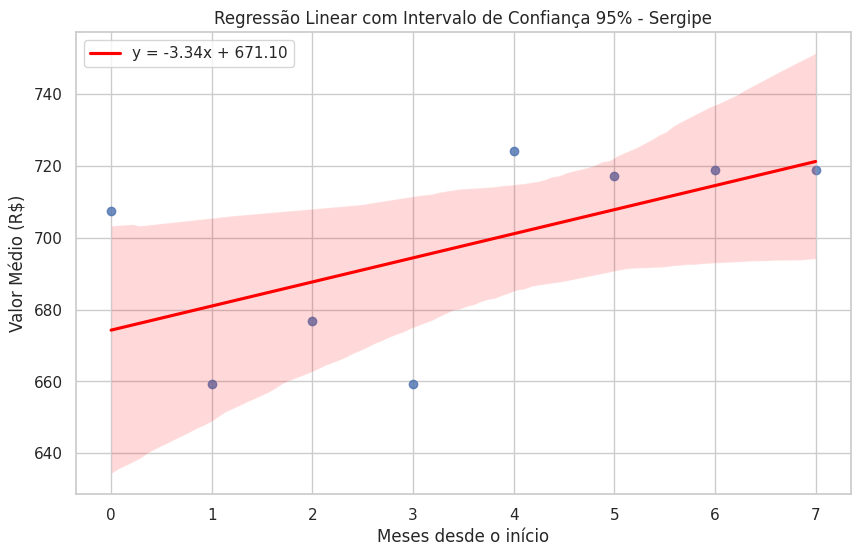

In [68]:
# Versão Alternativa com intervalo de confiança:

plt.figure(figsize=(10, 6))
sns.regplot(x=X.flatten(), y=y, ci=95,
            line_kws={'color': 'red', 'label': f'y = {inclinacao_SE:.2f}x + {intercepto_SE:.2f}'})
plt.title('Regressão Linear com Intervalo de Confiança 95% - Sergipe')
plt.xlabel('Meses desde o início')
plt.ylabel('Valor Médio (R$)')
plt.legend()
plt.grid(True)
plt.show()

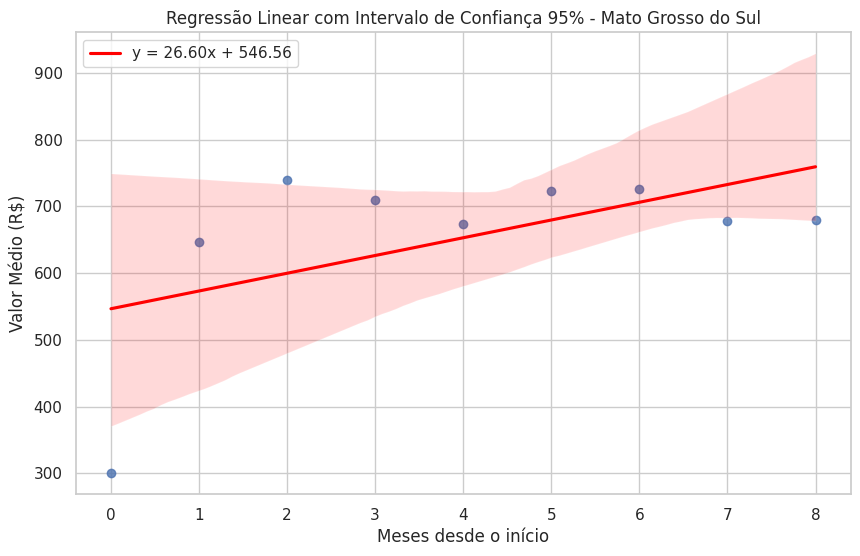

In [48]:
# Versão Alternativa com intervalo de confiança:

plt.figure(figsize=(10, 6))
sns.regplot(x=X.flatten(), y=y, ci=95,
            line_kws={'color': 'red', 'label': f'y = {inclinacao_MS:.2f}x + {intercepto_MS:.2f}'})
plt.title('Regressão Linear com Intervalo de Confiança 95% - Mato Grosso do Sul')
plt.xlabel('Meses desde o início')
plt.ylabel('Valor Médio (R$)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# 4 - ANÁLISE COMPARATIVA

'''Durante o período de 8 meses ocorreu:

- Aumento da quantidade de beneficiários nos 3 estados;

- No estado do Acre o valor inicial do benefício mínimo foi de 350.00, o médio de 707.40 e o máximo de 1336.00;
- No estado do Acre o valor final do benefício mínimo foi de 300.00, o médio de 724.24 e o máximo de 2104.00;

- No estado de Sergipe o valor inicial do benefício mínimo foi de 700.00, o médio de 700.00 e o máximo de 700.00;
- No estado de Sergipe o valor final do benefício mínimo foi de 300.00, o médio de 627.89 e o máximo de 1728.00;

- No estado do Mato Grosso do Sul o valor inicial do benefício mínimo foi de 300.00, o médio de 300.00 e o máximo de 300.00;
- No estado do Mato Grosso do Sul o valor final do benefício mínimo foi de 300.00, o médio de 673.75 e o máximo de 1436.00;

- O valor inicial do benefício mínimo mais alto foi no estado de Sergipe;
- O valor inicial da média do benefício mais alto foi no estado do Acre;
- O valor inicial do benefício máximo mais alto foi no estado do Acre;

- O estado que teve maior o maior crescimento mensal em relação ao valor médio do benefício foi o Mato Grosso do Sul,
pois salto de 300.00 para 673.15 em 8 meses com um crescimento de 124.59% neste período;

- O Intervalo de Confiança demonstra a linha de tendência da função, pontuando os valores máximos e mínimos de cada período;
- O Intervalo de Confiança de 95 %  deixa a linha sempre próxima a média em cada período, pontuando também os valores máximos e mínimos,
e sombreia a faixa da margem de erro em um intervalo próximo à média;
- O Intervalo de Confiança é mais preciso para esta anállise, pois utiliza linha de tendência, máximos e mínimos.

'''
